In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Limits of simple regression

vấn đề của regression là nó không cho t biết rõ causasion(nguyên nhân)

A có thể cause B và ngược lại

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import linregress

import statsmodels.formula.api as smf


In [3]:
#For VS code path
#brfss = pd.read_hdf(r'D:\sem 2 year 3\DataCamp\Dataset\New folder\Google_Colab_DataCamp_Data_Analyst\Dataset_Exploratory Data Analysis in Python\brfss.hdf5', 'brfss')

#For GG colab gg drive path
brfss = pd.read_hdf(r'/content/drive/MyDrive/DataCamp and Linkedin Learning/CAREER TRACK Data Analyst with Python/Dataset/Exploratory Data Analysis in Python/brfss.hdf5', 'brfss')

In [4]:
import statsmodels.formula.api as smf

In [5]:
results = smf.ols('INCOME2 ~ _VEGESU1', data = brfss).fit()
results.params

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

* ols:  stands for "ordinary least squares", another name for regression
* The first argument is a formula string that specifies that we want to regress income as a function of vegetable consumption. 

* The second argument is the BRFSS DataFrame.

* **we have to run dot fit() to get the results**

#Multiple regression

dataset: gss(general survey) from chapter 2

In [6]:
#For VS code path
#gss = pd.read_hdf(r'/content/drive/MyDrive/DataCamp and Linkedin Learning/CAREER TRACK Data Analyst with Python/Dataset/Exploratory Data Analysis in Python/gss.hdf5', 'gss')

#For GG colab gg drive path
gss = pd.read_hdf(r'/content/drive/MyDrive/DataCamp and Linkedin Learning/CAREER TRACK Data Analyst with Python/Dataset/Exploratory Data Analysis in Python/gss.hdf5', 'gss')

In [7]:
results = smf.ols('realinc ~ educ', data = gss).fit()
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

`'realinc ~ educ'`

 Ở đây hiểu là realinc là variable để predict còn educ là inform the prediction

##Adding age

In [8]:
results = smf.ols('realinc ~ educ + age', data=gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

`...~ educ + age`

dấu + thể hiện rằng ta mong đợi contribution của cả 2 variable 

`educ          3655.166921`: thể hiện rằng estimated slope, cao hơn so với model trước

`age             83.731804`: nghĩa là khoảng 83$ cho 1 tuổi. Có thể nói rằng slope này quá nhỏ 

In [9]:
grouped = gss.groupby('age')
mean_income_by_age = grouped['realinc'].mean()

Text(0, 0.5, 'Income (1986 $)')

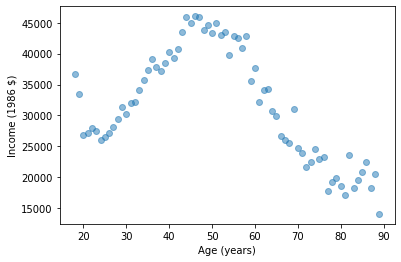

In [10]:
plt.plot(mean_income_by_age, 'o', alpha = 0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')

Mức lương tăng dần từ 20 tới 50 tuổi nhưng sau đó giảm dần. Non linear relationship đó là lý do tại sao estimated slope so low

**Remember that correlation and simple regression can't measure non-linear relationships. But multiple regression can!**

## Adding a quadratic term

In [11]:
gss['age2'] = gss['age']**2

In [12]:
model_1 = smf.ols('realinc ~ educ + age + age2',data = gss)
results_2 =model_1.fit()
results_2.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

Như đã nói, income ảnh hưởng bởi tuổi là khoảng 1k7$. Nhưng nếu bình phương lên thì slope sẽ bị âm

###Plot income and education

To get a closer look at the relationship between income and education, let's use the variable 'educ' to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called gss.

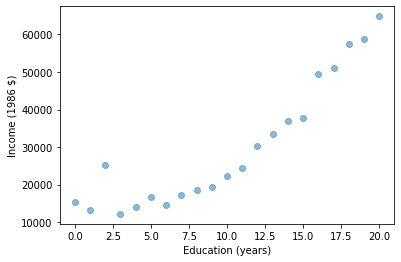

In [13]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha = 0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

#Visualizing regression results

In [14]:
#Modelling Income and age
gss['age2'] = gss['age']**2
gss['educ2'] = gss['educ']**2


In [15]:
model = smf.ols('realinc ~ educ + educ2 + age + age2',data = gss)
results = model.fit()
results.params

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

In [16]:
df = pd.DataFrame()
df['age'] = np.linspace(18,85)
df['age2'] = df['age']**2
df['educ'] = 12 #assign 12 year of education
df['educ2'] = df['educ']**2

In [17]:
pred12 = results.predict(df)


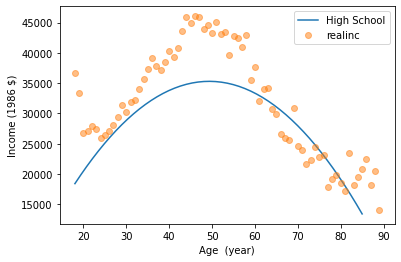

In [18]:
plt.plot(df['age'], pred12, label = 'High School')
plt.plot(mean_income_by_age, 'o', alpha = 0.5, label = 'realinc')

plt.xlabel('Age  (year)')
plt.ylabel('Income (1986 $)')
plt.legend()

Tạo ptr bậc 2 cho 2 cấp độ học cao hơn


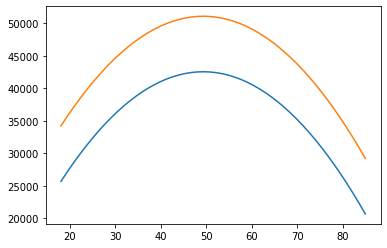

In [19]:
df['educ'] = 14 #assign 12 year of education
df['educ2'] = df['educ']**2
pred14 = results.predict(df)

df['educ'] = 16 #assign 12 year of education
df['educ2'] = df['educ']**2
pred16 = results.predict(df)

plt.plot(df['age'], pred14, label = 'Associate')
plt.plot(df['age'], pred16, label = 'Bachelor')

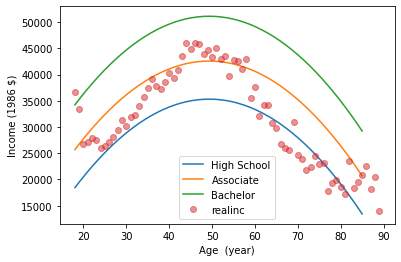

In [20]:
plt.plot(df['age'], pred12, label = 'High School')
plt.plot(df['age'], pred14, label = 'Associate')
plt.plot(df['age'], pred16, label = 'Bachelor')
plt.plot(mean_income_by_age, 'o', alpha = 0.5, label = 'realinc')

plt.xlabel('Age  (year)')
plt.ylabel('Income (1986 $)')
plt.legend()

 The lines show **mean income**, as predicted by the model, as a function of age, for three levels of education. This visualization helps validate the model since we can compare the predictions with the data. And it helps us interpret the model since we can see the separate contributions of age and education.

Making predictions

At this point, we have a model that predicts income using age, education, and sex.

Let's see what it predicts for different levels of education, holding age constant.

In [21]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


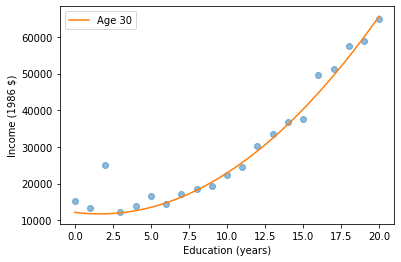

In [22]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha = 0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

#Logistic regression

##Categorial variable
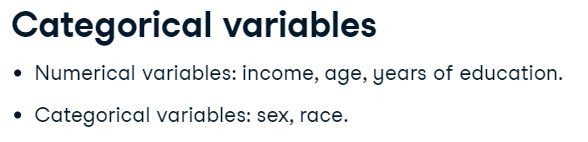

with StatsModels, it is easy to inclue cate_var

##Sex and Income

In [23]:
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results_3 = smf.ols(formula, data =gss).fit()
results_3.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

**`...+ C(sex)`**

, the letter C indicates that sex is a categorical variable.
* The regression treats the value sex=1, which is male, as the default, and reports the difference associated with the value sex=2, which is female.
* So this result indicates that income for women is about $4100 less than for men, after controlling for age and education.

##Boolean variable
                        *1 là yes và 2 là no*

If a categorical variable has only two values, it's called a boolean variable. For example, one of the questions in the General Social Survey asks "Would you favor or oppose a law which would require a person to obtain a police permit before he or she could buy a gun?" The variable is called `gunlaw`,

In [24]:
gss['gunlaw'].value_counts()


1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

##Logistic Regression



In [25]:
gss['gunlaw'].replace([2],[0], inplace = True)
gss['gunlaw'].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

In [27]:
gss['gunlaw'].replace([2],[0], inplace = True)
gss['gunlaw'].value_counts()

formula_1 = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results_4 = smf.logit(formula_1, data = gss).fit()

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


In [28]:
results_4.params


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

giá trị đang ở dạng log odd. Hiểu sơ là

* positive values are associated with things that make the outcome more likely; negative values make the outcome less likely. 

* For example, the parameter associated with sex=2 is 0.75, which indicates that women are more likely to support this form of gun control. To see how much more likely, we can generate and plot predictions, as we did with linear regression.

##Generating predictions


In [29]:
df_1 = pd.DataFrame()
df_1['age'] = np.linspace(18,89)
df_1['educ'] = 12

In [30]:
df_1['age2'] = df_1['age']**2
df_1['educ2'] = df_1['educ']**2

In [33]:
df_1['sex'] = 1
pred1 = results_4.predict(df_1)

df_1['sex'] = 2
pred2 = results_4.predict(df_1)

##Visualizing Result

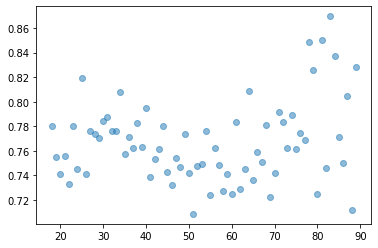

In [34]:
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age,'o', alpha =0.5)

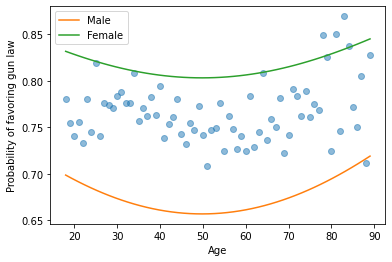

In [35]:
grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age,'o', alpha =0.5)

plt.plot(df_1['age'], pred1, label = 'Male')
plt.plot(df_1['age'], pred2, label = 'Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()

Predicting a binary variable

Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable grass records the answer to the question "Do you think the use of marijuana should be made legal or not?"

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


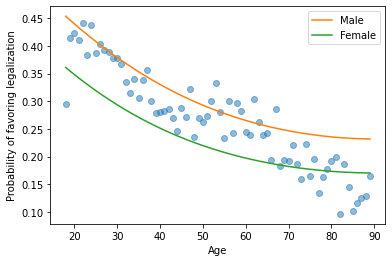

In [36]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()